In [1]:
import numpy as np
import sys
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import glob

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# VEST NC 2020

## VEST's Documentation File

Election results and precinct shapefile from the NC State Board of Elections (https://www.ncsbe.gov/results-data)

Buncombe 681, Henderson CV, Wake 01-07A, 07-07A are missing from the 20201018 shapefile. They are added from the 20190827 shapefile.

North Carolina produces two sets of election results data. The precinct results are the unaltered results as initially reported by the counties. Many counties report early votes by vote center while provisional and other nonstandard ballots may be reported countywide. The precinct-sorted results are then produced within 30 days after the election. In the precinct-sorted data nearly all votes are assigned to precincts regardless of the manner by which the ballots were cast. However, North Carolina law requires the addition of statistical "noise" to the precinct-sorted data wherever any given vote by any specific voter may otherwise be deduced via cross referencing the various election-related data sets produced by the SBE.

For the 2020 general election 51 counties reported all votes by precinct in their initial precinct results. The precinct-sorted data set was used instead for the counties listed below.

Alleghany, Avery, Beaufort, Bertie*, Bladen, Buncombe, Cabarrus, Caldwell, Camden, Currituck, Dare, Davidson*, Davie, Duplin*, Durham*, Edgecombe, Guilford, Halifax*, Harnett, Haywood, Henderson, Hertford, Hyde, Johnston, Jones, Lee, Lincoln, Macon, Martin, Mecklenburg*, Moore, Nash, New Hanover*, Northampton*, Orange, Pasquotank, Pitt*, Polk, Richmond, Scotland, Stokes*, Surry*, Tyrrell*, Wake, Washington, Watauga, Wayne, Wilkes*, Yadkin

In counties marked by asterisk some votes were still reported by vote center or countywide in the precinct-sorted data. These were distributed by candidate to precincts based on the precinct-level reported vote. The precinct-sorted results were further adjusted to match the certified countywide totals based on the precinct-level vote by candidate.

G20PRERTRU - Donald J. Trump (Republican Party)  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party)  
G20PRECBLA - Don Blankenship (Constitution Party)  
G20PREOWRI - Write-in Votes  

G20USSRTIL - Thom Tillis (Republican Party)  
G20USSDCUN - Cal Cunningham (Democratic Party)  
G20USSLBRA - Shannon W. Bray (Libertarian Party)  
G20USSCHAY - Kevin E. Hayes (Constitution Party)  

G20GOVRFOR - Dan Forest (Republican Party)  
G20GOVDCOO - Roy Cooper (Democratic Party)  
G20GOVLDIF - Steven K. DiFiore (Libertarian Party)  
G20GOVCPIS - Al Pisano (Constitution Party)  

G20LTGRROB - Mark Robinson (Republican Party)  
G20LTGDHOL - Yvonne Lewis Holley (Democratic Party)  

G20ATGRONE - Jim O'Neill (Republican Party)  
G20ATGDSTE - Josh Stein (Democratic Party)  

G20TRERFOL - Dale R. Folwell (Republican Party)  
G20TREDCHA - Ronnie Chatterji (Democratic Party)  

G20SOSRSYK - E.C. Sykes (Republican Party)  
G20SOSDMAR - Elaine Marshall (Democratic Party)  

G20AUDRSTR - Anthony Wayne (Tony) Street (Republican Party)  
G20AUDDWOO - Beth A. Wood (Democratic Party)  

G20AGRRTRO - Steve Troxler (Republican Party)  
G20AGRDWAD - Jenna Wadsworth (Democratic Party)  

G20INSRCAU - Mike Causey (Republican Party)  
G20INSDGOO - Wayne Goodwin (Democratic Party)  

G20LABRDOB - Josh Dobson (Republican Party)  
G20LABDHOL - Jessica Holmes (Democratic Party)  

G20SPIRTRU - Catherine Truitt (Republican Party)  
G20SPIDMAN - Jen Mangrum (Democratic Party)  

G20SSCRNEW - Paul Newby (Republican Party)  
G20SSCDBEA - Cheri Beasley (Democratic Party)  

G20SSCRBER - Phil Berger, Jr. (Republican Party)  
G20SSCDINM - Lucy Inman (Democratic Party)  

G20SSCRBAR - Tamara Barringer (Republican Party)  
G20SSCDDAV - Mark Davis (Democratic Party)  

G20SACRWOO - April C. Wood (Republican Party)  
G20SACDSHI - Tricia Shields (Democratic Party)  

G20SACRGOR - Fred Gore (Republican Party)  
G20SACDCUB - Lora Christine Cubbage (Democratic Party)  

G20SACRDIL - Chris Dillon (Republican Party)  
G20SACDSTY - Gray Styers (Democratic Party)  

G20SACRCAR - Jeff Carpenter (Republican Party)  
G20SACDYOU - Reuben F. Young (Democratic Party)  

G20SACRGRI - Jefferson G. Griffin (Republican Party)  
G20SACDBRO - Chris Brook (Democratic Party)  

## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/nc_2020/nc_2020.shp")

In [3]:
vest_shp.shape

(2662, 53)

In [4]:
#vest_shp.head(1)

<AxesSubplot:>

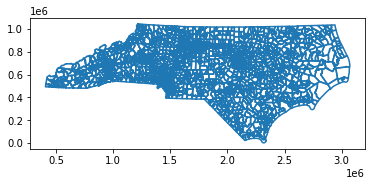

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Downloaded SOS Election Results using the same file linked by VEST.

In [6]:
election_results = pd.read_csv('./raw-from-source/SOS/results_pct_20201103/results_pct_20201103.txt', sep='\t', lineterminator='\n')

In [7]:
election_results.sort_values(by=['County', 'Precinct','Contest Name']).head(1)
#election_results[(election_results['County']=='STOKES')&(election_results['Contest Name']=='US PRESIDENT')].sort_values(by=['County', 'Precinct','Contest Name'])

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,\r
32933,ALAMANCE,11/03/2020,01,1,C,ALAMANCE COUNTY BOARD OF COMMISSIONERS,Bob Byrd,DEM,3,92,311,167,1,571,Y,\r


In [8]:
path = "./raw-from-source/SOS/results_pct_20201103/County Results"
  
# csv files in the path
files = glob.glob(path + "/*.txt")
  
# defining an empty list to store 
# content
nc_2020_counties = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    nc_2020_counties = pd.read_csv(filename, sep='\t', lineterminator='\n')
    content.append(nc_2020_counties)
    
# converting content to data frame
df_2020_cnty = pd.concat(content)
print(df_2020_cnty.shape)
df_2020_cnty.head(1)

(1498584, 19)


,county_id,county,election_dt,result_type_lbl,result_type_desc,contest_id,contest_title,contest_party_lbl,contest_vote_for,precinct_code,precinct_name,candidate_id,candidate_name,candidate_party_lbl,group_num,group_name,voting_method_lbl,voting_method_rslt_desc,vote_ct\r
0,3,ALLEGHANY,11/03/2020,STD,<NORMAL>,622,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,NaN,2,01,CHERRY LANE,1371,F.O. (Dale) Caveny,UNA,1,ELECTION DAY,V,Election Day,14


In [9]:
counties = df_2020_cnty.county.unique()
df_2020_cnty.columns = ["county_id","County","Election Date","result_type_lbl","result_type_desc","contest_id","Contest Name","Choice Party","contest_vote_for","Precinct","Precinct Name","candidate_id","Choice","Choice Party","group_num","group_name","voting_method","voting method_rslt","Total Votes"]
election_results = election_results[~election_results['County'].isin(counties)]
election_results[election_results['County']=='ALLEGHANY'].head(100)

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,\r


In [13]:
#Sum precinct votes for candidates
df_2020_cnty = df_2020_cnty.groupby(['County', 'Contest Name', 'Precinct', 'Choice'])["Total Votes"].sum().reset_index()

In [14]:
election_results = pd.concat([election_results,df_2020_cnty], axis=0, ignore_index=True)
election_results[election_results['County']=='ALLEGHANY'].head(100)

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,\r
85535,ALLEGHANY,NaN,01,NaN,NaN,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,F.O. (Dale) Caveny,NaN,NaN,NaN,NaN,NaN,NaN,87,NaN,NaN
85536,ALLEGHANY,NaN,01,NaN,NaN,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,"John Ulus Irwin, Jr.",NaN,NaN,NaN,NaN,NaN,NaN,485,NaN,NaN
85537,ALLEGHANY,NaN,01,NaN,NaN,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,Larry Davis,NaN,NaN,NaN,NaN,NaN,NaN,293,NaN,NaN
85538,ALLEGHANY,NaN,01,NaN,NaN,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,Lizabeth Reeves Roupe,NaN,NaN,NaN,NaN,NaN,NaN,357,NaN,NaN
85539,ALLEGHANY,NaN,01,NaN,NaN,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,Mechelle Luffman,NaN,NaN,NaN,NaN,NaN,NaN,602,NaN,NaN
85540,ALLEGHANY,NaN,01,NaN,NaN,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,OVER VOTE,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
85541,ALLEGHANY,NaN,01,NaN,NaN,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,UNDER VOTE,NaN,NaN,NaN,NaN,NaN,NaN,278,NaN,NaN
85542,ALLEGHANY,NaN,03A,NaN,NaN,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,F.O. (Dale) Caveny,NaN,NaN,NaN,NaN,NaN,NaN,206,NaN,NaN
85543,ALLEGHANY,NaN,03A,NaN,NaN,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,"John Ulus Irwin, Jr.",NaN,NaN,NaN,NaN,NaN,NaN,1280,NaN,NaN
85544,ALLEGHANY,NaN,03A,NaN,NaN,ALLEGHANY COUNTY BOARD OF COMMISSIONERS,Larry Davis,NaN,NaN,NaN,NaN,NaN,NaN,896,NaN,NaN


In [15]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="North Carolina"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
nc_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "37" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [16]:
candidates = election_results["Choice"].unique().tolist()
#candidates

In [17]:
election_results.loc[(election_results['Choice'] == "Write-In (Miscellaneous)") & (election_results["Contest Name"] == "US PRESIDENT"), "Choice"] = "Write-In Votes"
election_results.loc[(election_results['Choice'] == "Jade Simmons (Write-In)") & (election_results["Contest Name"] == "US PRESIDENT"), "Choice"] = "Write-In Votes"

In [18]:
#Create a list of candidates from the VEST documentation

# List of candidates names from VEST documentation
office_list = ['Donald J. Trump','Joseph R. Biden','Jo Jorgensen','Howie Hawkins','Don Blankenship',"Write-In Votes",'Thom Tillis',
        'Cal Cunningham','Shannon W. Bray','Kevin E. Hayes','Dan Forest','Roy Cooper','Steven J. DiFiore','Al Pisano','Mark Robinson','Yvonne Lewis Holley',"Jim O'Neill",'Josh Stein','Dale R. Folwell','Ronnie Chatterji','E.C. Sykes','Elaine Marshall','Anthony Wayne (Tony) Street','Beth A. Wood','Steve Troxler','Jenna Wadsworth','Mike Causey','Wayne Goodwin','Josh Dobson','Jessica Holmes','Catherine Truitt','Jen Mangrum','Paul Newby','Cheri Beasley','Phil Berger, Jr.','Lucy Inman','Tamara Barringer','Mark Davis','April C. Wood','Tricia Shields','Fred Gore','Lora Christine Cubbage','Chris Dillon','Gray Styers','Jeff Carpenter','Reuben F. Young','Jefferson G. Griffin','Chris Brook']
office_list = sorted(office_list)

In [19]:
election_results = election_results[election_results["Choice"].isin(office_list)]

In [20]:
election_results["Choice"].unique()

array(['Jen Mangrum', 'Jessica Holmes', 'Chris Dillon', 'Donald J. Trump',
       'Cheri Beasley', 'Paul Newby', 'April C. Wood', 'Josh Stein',
       'Steve Troxler', 'Phil Berger, Jr.', 'Thom Tillis',
       'Jefferson G. Griffin', 'Lucy Inman', 'Cal Cunningham',
       'E.C. Sykes', 'Wayne Goodwin', 'Write-In Votes', 'Kevin E. Hayes',
       'Fred Gore', 'Gray Styers', 'Jeff Carpenter',
       'Anthony Wayne (Tony) Street', 'Tricia Shields', 'Mike Causey',
       'Tamara Barringer', 'Reuben F. Young', 'Howie Hawkins',
       'Ronnie Chatterji', 'Chris Brook', 'Steven J. DiFiore',
       'Josh Dobson', 'Dan Forest', "Jim O'Neill",
       'Lora Christine Cubbage', 'Al Pisano', 'Dale R. Folwell',
       'Jenna Wadsworth', 'Mark Robinson', 'Catherine Truitt',
       'Elaine Marshall', 'Don Blankenship', 'Joseph R. Biden',
       'Roy Cooper', 'Beth A. Wood', 'Mark Davis', 'Jo Jorgensen',
       'Yvonne Lewis Holley', 'Shannon W. Bray'], dtype=object)

In [21]:
#Add FIPS columns
election_results["COUNTYFP10"] = election_results["County"].map(nc_fips_dict).fillna(election_results["County"])
vest_shp["COUNTYFP10"] = vest_shp['COUNTY_NAM'].map(nc_fips_dict).fillna(vest_shp['COUNTY_NAM'])

In [22]:
#Clean up precinct column by stripping the white space
election_results["Precinct"]=election_results["Precinct"].str.strip()

#Create a column to pivot table by concatenation the FIPS and precinct columns
election_results["pivot_col"]=election_results["COUNTYFP10"]+election_results["Precinct"]

In [23]:
#Run the pivot
pivoted_election_results = pd.pivot_table(election_results,values=["Total Votes"],index=["pivot_col"],columns=["Choice"],aggfunc=sum)

#Fill in N/A with 0
pivoted_election_results = pivoted_election_results.fillna(0)

#Clean the columns
pivoted_election_results.reset_index(drop=False,inplace=True)
pivoted_election_results.columns = pivoted_election_results.columns.droplevel(0)

In [24]:
pivoted_election_results.head(1)

Choice,,Al Pisano,Anthony Wayne (Tony) Street,April C. Wood,Beth A. Wood,Cal Cunningham,Catherine Truitt,Cheri Beasley,Chris Brook,Chris Dillon,Dale R. Folwell,Dan Forest,Don Blankenship,Donald J. Trump,E.C. Sykes,Elaine Marshall,Fred Gore,Gray Styers,Howie Hawkins,Jeff Carpenter,Jefferson G. Griffin,Jen Mangrum,Jenna Wadsworth,Jessica Holmes,Jim O'Neill,Jo Jorgensen,Joseph R. Biden,Josh Dobson,Josh Stein,Kevin E. Hayes,Lora Christine Cubbage,Lucy Inman,Mark Davis,Mark Robinson,Mike Causey,Paul Newby,"Phil Berger, Jr.",Reuben F. Young,Ronnie Chatterji,Roy Cooper,Shannon W. Bray,Steve Troxler,Steven J. DiFiore,Tamara Barringer,Thom Tillis,Tricia Shields,Wayne Goodwin,Write-In Votes,Yvonne Lewis Holley
0,00101,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [25]:
pivoted_election_results.columns.values[0] = "join_col"

In [26]:
pivoted_election_results.head(1)

Choice,join_col,Al Pisano,Anthony Wayne (Tony) Street,April C. Wood,Beth A. Wood,Cal Cunningham,Catherine Truitt,Cheri Beasley,Chris Brook,Chris Dillon,Dale R. Folwell,Dan Forest,Don Blankenship,Donald J. Trump,E.C. Sykes,Elaine Marshall,Fred Gore,Gray Styers,Howie Hawkins,Jeff Carpenter,Jefferson G. Griffin,Jen Mangrum,Jenna Wadsworth,Jessica Holmes,Jim O'Neill,Jo Jorgensen,Joseph R. Biden,Josh Dobson,Josh Stein,Kevin E. Hayes,Lora Christine Cubbage,Lucy Inman,Mark Davis,Mark Robinson,Mike Causey,Paul Newby,"Phil Berger, Jr.",Reuben F. Young,Ronnie Chatterji,Roy Cooper,Shannon W. Bray,Steve Troxler,Steven J. DiFiore,Tamara Barringer,Thom Tillis,Tricia Shields,Wayne Goodwin,Write-In Votes,Yvonne Lewis Holley
0,00101,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [27]:
#Add FIPS State and County columns
pivoted_election_results.insert(loc=0, column='STATEFP10', value='34')
pivoted_election_results.insert(loc=1, column='COUNTYFP10', value=pivoted_election_results['join_col'].str[0:3])
pivoted_election_results.insert(loc=3, column='Precinct', value=pivoted_election_results['join_col'].str[3:])

In [28]:
pivoted_election_results.head(1)

Choice,STATEFP10,COUNTYFP10,join_col,Precinct,Al Pisano,Anthony Wayne (Tony) Street,April C. Wood,Beth A. Wood,Cal Cunningham,Catherine Truitt,Cheri Beasley,Chris Brook,Chris Dillon,Dale R. Folwell,Dan Forest,Don Blankenship,Donald J. Trump,E.C. Sykes,Elaine Marshall,Fred Gore,Gray Styers,Howie Hawkins,Jeff Carpenter,Jefferson G. Griffin,Jen Mangrum,Jenna Wadsworth,Jessica Holmes,Jim O'Neill,Jo Jorgensen,Joseph R. Biden,Josh Dobson,Josh Stein,Kevin E. Hayes,Lora Christine Cubbage,Lucy Inman,Mark Davis,Mark Robinson,Mike Causey,Paul Newby,"Phil Berger, Jr.",Reuben F. Young,Ronnie Chatterji,Roy Cooper,Shannon W. Bray,Steve Troxler,Steven J. DiFiore,Tamara Barringer,Thom Tillis,Tricia Shields,Wayne Goodwin,Write-In Votes,Yvonne Lewis Holley
0,34,001,00101,01,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [29]:
pivoted_election_results.columns = ["STATEFP10","COUNTYFP10","join_col","Precinct","G20GOVCPIS","G20AUDRSTR","G20SACRWOO","G20AUDDWOO","G20USSDCUN","G20SPIRTRU","G20SSCDBEA","G20SACDBRO","G20SACRDIL","G20TRERFOL","G20GOVRFOR","G20PRECBLA","G20PRERTRU","G20SOSRSYK","G20SOSDMAR","G20SACRGOR","G20SACDSTY","G20PREGHAW","G20SACRCAR","G20SACRGRI","G20SPIDMAN","G20AGRDWAD","G20LABDHOL","G20ATGRONE","G20PRELJOR","G20PREDBID","G20LABRDOB","G20ATGDSTE","G20USSCHAY","G20SACDCUB","G20SSCDINM","G20SSCDDAV","G20LTGRROB","G20INSRCAU","G20SSCRNEW","G20SSCRBER","G20SACDYOU","G20TREDCHA","G20GOVDCOO","G20USSLBRA","G20AGRRTRO","G20GOVLDIF","G20SSCRBAR","G20USSRTIL","G20SACDSHI","G20INSDGOO","G20PREOWRI","G20LTGDHOL"]

In [30]:
pivoted_election_results.head(1)

,STATEFP10,COUNTYFP10,join_col,Precinct,G20GOVCPIS,G20AUDRSTR,G20SACRWOO,G20AUDDWOO,G20USSDCUN,G20SPIRTRU,G20SSCDBEA,G20SACDBRO,G20SACRDIL,G20TRERFOL,G20GOVRFOR,G20PRECBLA,G20PRERTRU,G20SOSRSYK,G20SOSDMAR,G20SACRGOR,G20SACDSTY,G20PREGHAW,G20SACRCAR,G20SACRGRI,G20SPIDMAN,G20AGRDWAD,G20LABDHOL,G20ATGRONE,G20PRELJOR,G20PREDBID,G20LABRDOB,G20ATGDSTE,G20USSCHAY,G20SACDCUB,G20SSCDINM,G20SSCDDAV,G20LTGRROB,G20INSRCAU,G20SSCRNEW,G20SSCRBER,G20SACDYOU,G20TREDCHA,G20GOVDCOO,G20USSLBRA,G20AGRRTRO,G20GOVLDIF,G20SSCRBAR,G20USSRTIL,G20SACDSHI,G20INSDGOO,G20PREOWRI,G20LTGDHOL
0,34,001,00101,01,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [31]:
election_results = pivoted_election_results.copy()

## Compare vote totals before allocation

In [32]:
races = [x for x in vest_shp.columns if 'G20' in x]
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PRECBLA',
 'G20PREOWRI',
 'G20USSRTIL',
 'G20USSDCUN',
 'G20USSLBRA',
 'G20USSCHAY',
 'G20GOVRFOR',
 'G20GOVDCOO',
 'G20GOVLDIF',
 'G20GOVCPIS',
 'G20LTGRROB',
 'G20LTGDHOL',
 'G20ATGRONE',
 'G20ATGDSTE',
 'G20TRERFOL',
 'G20TREDCHA',
 'G20SOSRSYK',
 'G20SOSDMAR',
 'G20AUDRSTR',
 'G20AUDDWOO',
 'G20AGRRTRO',
 'G20AGRDWAD',
 'G20INSRCAU',
 'G20INSDGOO',
 'G20LABRDOB',
 'G20LABDHOL',
 'G20SPIRTRU',
 'G20SPIDMAN',
 'G20SSCRNEW',
 'G20SSCDBEA',
 'G20SSCRBER',
 'G20SSCDINM',
 'G20SSCRBAR',
 'G20SSCDDAV',
 'G20SACRWOO',
 'G20SACDSHI',
 'G20SACRGOR',
 'G20SACDCUB',
 'G20SACRDIL',
 'G20SACDSTY',
 'G20SACRCAR',
 'G20SACDYOU',
 'G20SACRGRI',
 'G20SACDBRO']

In [33]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

107698248
107724776


In [34]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [35]:
searchfor = ['ABS', 'PROVISIONAL','ONE STOP','CURBSIDE','TRANS','OS ','OS-',' OS','PROVISIOINAL','OSAP','OSCA','OSCH','OSKD','OSLL','OSLOB','OSNR','OSOP','OSTA','OSWA','PROVI ']
in_sos =  election_results[election_results["Precinct"].str.contains('|'.join(searchfor))]
in_sos = in_sos.groupby(by=["COUNTYFP10"]).sum().reset_index()
in_sos
#in_sos = election_results[election_results['Real Precinct']=='N']
#in_sos = in_sos.groupby(by=["COUNTYFP10"]).sum().reset_index()
#in_sos

,COUNTYFP10,G20GOVCPIS,G20AUDRSTR,G20SACRWOO,G20AUDDWOO,G20USSDCUN,G20SPIRTRU,G20SSCDBEA,G20SACDBRO,G20SACRDIL,G20TRERFOL,G20GOVRFOR,G20PRECBLA,G20PRERTRU,G20SOSRSYK,G20SOSDMAR,G20SACRGOR,G20SACDSTY,G20PREGHAW,G20SACRCAR,G20SACRGRI,G20SPIDMAN,G20AGRDWAD,G20LABDHOL,G20ATGRONE,G20PRELJOR,G20PREDBID,G20LABRDOB,G20ATGDSTE,G20USSCHAY,G20SACDCUB,G20SSCDINM,G20SSCDDAV,G20LTGRROB,G20INSRCAU,G20SSCRNEW,G20SSCRBER,G20SACDYOU,G20TREDCHA,G20GOVDCOO,G20USSLBRA,G20AGRRTRO,G20GOVLDIF,G20SSCRBAR,G20USSRTIL,G20SACDSHI,G20INSDGOO,G20PREOWRI,G20LTGDHOL
0,001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,015,0,5,6,29,29,6,26,27,5,6,6,0,9,5,29,5,27,0,4,4,28,27,30,5,0,29,5,30,0,27,28,27,5,5,7,5,27,28,32,1,8,0,6,7,28,29,1,29
6,017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
#election_results = election_results[election_results['Real Precinct']=='Y']
election_results = election_results[~election_results["Precinct"].str.contains('|'.join(searchfor))]
election_results = allocate_absentee(election_results,in_sos,races,'COUNTYFP10')
print('Done')

Done


## Compare Election Result Totals

### Compare Vote Totals

In [37]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

107698248
107724776.0


### Compare Race Totals

In [38]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [39]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G20PRERTRU has a difference of -73.0 votes
	VEST: 2758775 votes
	SOURCES: 2758848.0 votes
G20PREDBID has a difference of -149.0 votes
	VEST: 2684292 votes
	SOURCES: 2684441.0 votes
G20PRELJOR has a difference of 1.0 votes
	VEST: 48678 votes
	SOURCES: 48677.0 votes
G20PREGHAW has a difference of -4.0 votes
	VEST: 12195 votes
	SOURCES: 12199.0 votes
G20PRECBLA has a difference of -1296.0 votes
	VEST: 7549 votes
	SOURCES: 8845.0 votes
G20PREOWRI has a difference of 18.0 votes
	VEST: 13315 votes
	SOURCES: 13297.0 votes
G20USSRTIL has a difference of -47.0 votes
	VEST: 2665598 votes
	SOURCES: 2665645.0 votes
G20USSDCUN has a difference of -810.0 votes
	VEST: 2569965 votes
	SOURCES: 2570775.0 votes
G20USSLBRA has a difference of -19.0 votes
	VEST: 171571 votes
	SOURCES: 171590.0 votes
G20USSCHAY has a difference of -498.0 votes
	VEST: 67818 votes
	SOURCES: 68316.0 votes
G20GOVRFOR has a difference of -47.0 votes
	VEST: 2586605 votes
	SOURCES: 2586652.0 votes
G20G

### Compare County Totals

In [40]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [41]:
county_totals_check(vest_shp,election_results,races,'COUNTYFP10')

***Countywide Totals Check***

G20PRERTRU contains differences in these counties:
	005 has a difference of -1.0 votes
		VEST: 4527 votes
		SOURCES: 4528.0 votes
	011 has a difference of 4.0 votes
		VEST: 7172 votes
		SOURCES: 7168.0 votes
	015 has a difference of -1.0 votes
		VEST: 3817 votes
		SOURCES: 3818.0 votes
	017 has a difference of 9.0 votes
		VEST: 9676 votes
		SOURCES: 9667.0 votes
	025 has a difference of -1.0 votes
		VEST: 63237 votes
		SOURCES: 63238.0 votes
	027 has a difference of 6.0 votes
		VEST: 32119 votes
		SOURCES: 32113.0 votes
	055 has a difference of -1.0 votes
		VEST: 13938 votes
		SOURCES: 13939.0 votes
	057 has a difference of -4.0 votes
		VEST: 64658 votes
		SOURCES: 64662.0 votes
	061 has a difference of -132.0 votes
		VEST: 13793 votes
		SOURCES: 13925.0 votes
	063 has a difference of -1.0 votes
		VEST: 32459 votes
		SOURCES: 32460.0 votes
	065 has a difference of -1.0 votes
		VEST: 9206 votes
		SOURCES: 9207.0 votes
	081 has a difference of -1.0 votes
		

## Attempt to Join

In [ ]:
#Add join columns to both
vest_shp["join_col"]=vest_shp['COUNTYFP10']+vest_shp['PREC_ID']

In [ ]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

In [ ]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [ ]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PREC_ID"])
print(len(empty_precincts))

In [ ]:
data_columns = races
empty_precincts = []
for index, row in election_results.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["Precinct"])
print(len(empty_precincts))

## Attempt Join

In [ ]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

In [ ]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP10_x','Precinct','G20PRERTRU_x','COUNTYFP10_y','PREC_ID','join_col']]

### Compare Precinct Votes

In [ ]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [ ]:
precinct_votes_check(join_attempt_one[join_attempt_one["_merge"]=="both"],races,False,'PREC_ID')

## Differences in Precinct totals  
  
There are a number of differences in the Precinct Totals. This is most likely due to the fact that VEST used precinct-sorted data for 39 counties.

# Precinct Shapefiles
## Documentation
Precinct shapefiles from the North Carolina State Board of Elections: SBE_PRECINCTS_20170519.zip from  
source-https://dl.ncsbe.gov/?prefix=PrecinctMaps/ https://www.ncsbe.gov/results-data/voting-maps-redistricting

### Precinct Shapefiles

In [ ]:
shapefiles_nc = gp.read_file('./raw-from-source/SOS/SBE_PRECINCTS_20170519/Precincts2.shp')

In [ ]:
vest_shp = vest_shp.to_crs(3857)
shapefiles_nc = shapefiles_nc.to_crs(3857)

In [ ]:
shapefiles_nc.head(1)

In [ ]:
shapefiles_nc.boundary.plot()

In [ ]:
print(shapefiles_nc.shape)
vest_shp.shape

In [ ]:
ax = shapefiles_nc.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [ ]:
shapefiles_nc["COUNTYFP10"] = shapefiles_nc["COUNTY_NAM"].map(nc_fips_dict).fillna(shapefiles_nc["COUNTY_NAM"])

In [ ]:
shapefiles_nc["join_col"]=shapefiles_nc['COUNTYFP10']+shapefiles_nc['PREC_ID']

In [ ]:
join_attempt_one = pd.merge(shapefiles_nc,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

In [ ]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP10_x','PREC_ID','COUNTYFP10_y','Precinct','join_col']]

In [ ]:
shapefiles_nc_comp = join_attempt_one[join_attempt_one['_merge'] == 'both']

In [ ]:
final_merge = pd.merge(shapefiles_nc_comp,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

In [ ]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

In [ ]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [ ]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")